### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

<span style="color:red"> The time that spent for naming the colors is dependent variable. The colors shown are congruent (color of the word = word actual meaning) or not is the independent variable. </span> 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$H_0$ (null hypotheses): Reading times are equal => μI = μC  <br>
$H_1$ : Reading time in incongruent is higher  => μI ≥ μC
<br><br>
<span style="color:red">  The null hypotheses is population mean of read times of congruent tests is equal to population mean of the read times of incongruent tests. We do not know the population parameters but we can use sample statistics to estimate population parameters.  
 </span> 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from math import *
import numpy as np
%pylab inline


C:\Users\tcsnefsiogullari\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
df = pd.read_csv('stroopdata.csv')

In [5]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


<span style="color:red"> So, we have 24 congruent and incongruent samples.   </span> 

In [25]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


<span style="color:red"> The mean of the congruent is 14,05 while incongruent is 22,01. In addition, std deviations are 3,55 and 4,79 respectively. In order to decide whether the difference is statistically significant or not, we have to look at t-test result.   </span> 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

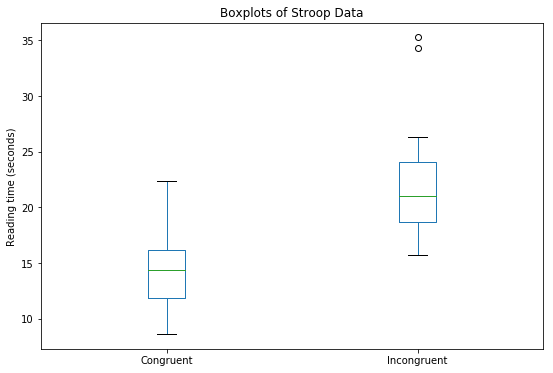

In [24]:
# Build the visualizations here
df.plot.box(figsize=(9,6))
title('Boxplots of Stroop Data')
plt.ylabel('Reading time (seconds)')

<span style="color:red"> As it is seen above, the incongruent sample's time is greater then congruent ones. Let's have a look at histograms as well:  </span> 

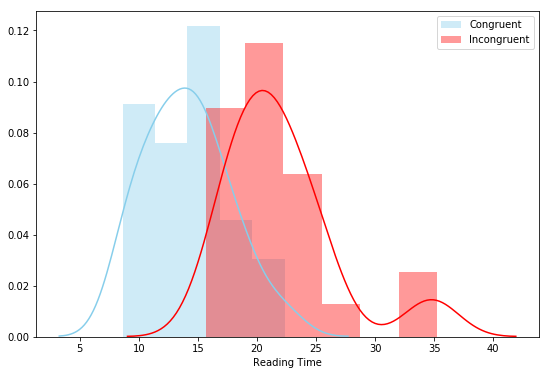

In [35]:
plt.figure(figsize=(9,6))
sns.distplot( df["Congruent"] , color="skyblue", label="Congruent", )
sns.distplot( df["Incongruent"] , color="red", label="Incongruent", axlabel="Reading Time")
plt.legend()
 
#sns.plt.show()


In [36]:
df['Difference'] = df ['Incongruent']- df['Congruent']
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


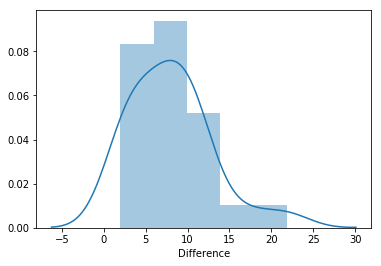

In [42]:
sns.distplot( df["Difference"])

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

<span style="color:red">  
The data is not normally distributed, we have only 24 samples and we do not know the population parameters and standard deviation. Hence, we could not use Z-test. <br><br>
The appripriate test for this set of hypothesis is t-test. I want to see one sided t-test since the claim is that the reading time of incongruent cases are high.
</span>

In [57]:
# Perform the statistical test here
# assuming unequal population variances
#t, p = stats.ttest_ind(df.Incongruent, df.Congruent, equal_var=False, ) # a.k.a. Welch's t-test
#print("Assuming unequal variances, the t-statistic is %.4f and the p-value is %.4f." %(t, p))

In [58]:
#print("Type-I error:", 1-stats.t.cdf(t, 23))

In [59]:
#t_critical = stats.t.ppf(0.975, 23) #where α=0.025
#t_critical $$tstatistic = μ−0 / σ/√n $$


$$
t_{statistic} = {\frac{μ−0}{\fracσ{\sqrt[]n}}}
$$

In [63]:
d_mean = df['Difference'].mean()
d_std = df['Difference'].std(ddof=1)
print ("Mean difference:", d_mean)
print ("Standard deviation of the differences: ", d_std)

Mean difference: 7.964791666666667
Standard deviation of the differences:  4.864826910359056


In [64]:
d_SE = d_std/(sqrt(24)) #standard error of the differences

In [65]:
t_statistic = df['Difference'].mean()/SE_d_bar
t_statistic

8.020706944109957

In [66]:
# %95 confidence interval
CI_1 = d_mean - (t_critical*d_SE)
CI_2 = d_mean + (t_critical*d_SE)
                      
print ("%95 confidence Interval: (", CI_1, ", ", CI_2, ")" ) 

%95 confidence Interval: ( 5.91055542397 ,  10.0190279094 )


<span style="color:red"> It is obvious that the there is a statistically significant difference between incongruent and congruent reading times. p-value is less then 0.0001. Hence, we can reject the null hypothesis and claim that reading times of incongruent case is higher. </span> 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

<span style="color:red"> People read automaticly without thinking about meaning. When the meaning and the word different, people tend to spent a few time to answer. We can reach similar effect with printing different sizes with incongruent words. To illustrate: </span>
## small
### big
# medium